In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import sklearn
import scipy

In [2]:
from sklearn import metrics, model_selection, preprocessing, ensemble, tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score 
from sklearn.metrics import confusion_matrix

In [3]:
from Classification import model_fit, plot_confusion_matrix, model_fit2, plot_prob, get_precision_recall
from PlottingFunction import lda_1Dplot, plotModel, data_1Dplot

In [4]:
from xgboost import XGBClassifier
xgb_cl = XGBClassifier()

In [5]:
xgb_cl

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)

In [6]:
heart = pd.read_csv('FinalHeart.csv')
heart.drop(['Unnamed: 0'],axis=1,inplace=True)
heartPCA = pd.read_csv('PCAData.csv')
heartPCA.drop(['Unnamed: 0'],axis=1, inplace=True)
heartPCA['num'] = heart.num
heartICA = pd.read_csv('ICAData.csv')
heartICA.drop(['Unnamed: 0'],axis=1, inplace=True)
heartICA['num'] = heart.num
heartFactor = pd.read_csv('FactorData.csv')
heartFactor.drop(['Unnamed: 0'],axis=1, inplace=True)
heartFactor['num'] = heart.num

In [7]:
X = heart.drop(['num'],axis=1).copy()
Y = heart.num.copy()
XPCA = heartPCA.drop(['num'],axis=1).copy()
YPCA = heartPCA.num.copy()
XICA = heartICA.drop(['num'],axis=1).copy()
YICA = heartICA.num.copy()
XFactor = heartFactor.drop(['num'],axis=1).copy()
YFactor = heartFactor.num.copy()

In [8]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.33, stratify=Y)
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(SC.fit_transform(X),Y, test_size= 0.33, stratify=Y)
X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA = train_test_split(XPCA, YPCA, test_size = 0.33, random_state=144, shuffle=True, stratify = Y)
X_train_ICA, X_test_ICA, Y_train_ICA, Y_test_ICA = train_test_split(XICA, YICA, test_size = 0.33, random_state=144, shuffle=True, stratify = Y)
X_train_F, X_test_F, Y_train_F, Y_test_F = train_test_split(XFactor, YFactor, test_size = 0.33, random_state=144, shuffle=True, stratify = Y)

In [10]:
xgb_cl = XGBClassifier()
xgb_cl.set_params(random_state=144)
model_fit2(xgb_cl, X_train, X_test, Y_train, Y_test)

XGBClassifier

Train score is :1.0
Test score is :0.559


In [11]:
xgb_cl = XGBClassifier()
xgb_cl.set_params(random_state=144)
model_fit2(xgb_cl, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled)

XGBClassifier

Train score is :1.0
Test score is :0.634


In [12]:
xgb_cl = XGBClassifier()
xgb_cl.set_params(random_state=144)
model_fit2(xgb_cl, X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA)

XGBClassifier

Train score is :1.0
Test score is :0.622


In [13]:
xgb_cl = XGBClassifier()
xgb_cl.set_params(random_state=144)
model_fit2(xgb_cl, X_train_ICA, X_test_ICA, Y_train_ICA, Y_test_ICA)

XGBClassifier

Train score is :1.0
Test score is :0.647


In [14]:
xgb_cl = XGBClassifier()
xgb_cl.set_params(random_state=144)
model_fit2(xgb_cl, X_train_F, X_test_F, Y_train_F, Y_test_F)

XGBClassifier

Train score is :1.0
Test score is :0.63


In [24]:
xgb_cl = XGBClassifier(gamma = 5, max_depth = 5)
xgb_cl.set_params(random_state=144)
model_fit2(xgb_cl, X_train, X_test, Y_train, Y_test)

XGBClassifier

Train score is :0.687
Test score is :0.622


In [31]:
xgb_cl = XGBClassifier(gamma = 5, max_depth = 5)
xgb_cl.set_params(random_state=144)
model_fit2(xgb_cl, X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled)

XGBClassifier

Train score is :0.672
Test score is :0.647


In [32]:
xgb_cl = XGBClassifier(gamma = 5, max_depth = 5)
xgb_cl.set_params(random_state=144)
model_fit2(xgb_cl, X_train_PCA, X_test_PCA, Y_train_PCA, Y_test_PCA)

XGBClassifier

Train score is :0.707
Test score is :0.639


In [33]:
xgb_cl = XGBClassifier(gamma = 5, max_depth = 5)
xgb_cl.set_params(random_state=144)
model_fit2(xgb_cl, X_train_ICA, X_test_ICA, Y_train_ICA, Y_test_ICA)

XGBClassifier

Train score is :0.685
Test score is :0.639


In [34]:
xgb_cl = XGBClassifier(gamma = 5, max_depth = 5)
xgb_cl.set_params(random_state=144)
model_fit2(xgb_cl, X_train_F, X_test_F, Y_train_F, Y_test_F)

XGBClassifier

Train score is :0.68
Test score is :0.63


In [25]:
prob_train = xgb_cl.predict_proba(X_train)
prob_test  = xgb_cl.predict_proba(X_test)

In [26]:
from sklearn.metrics import confusion_matrix

XGBClassifier


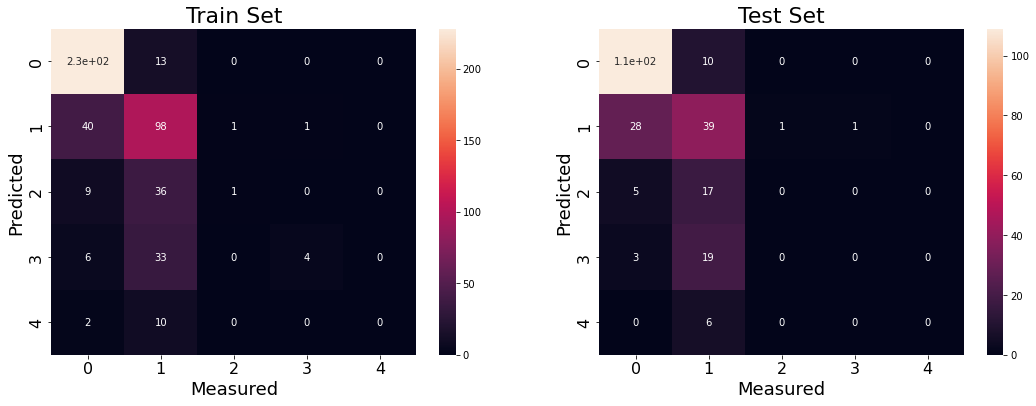

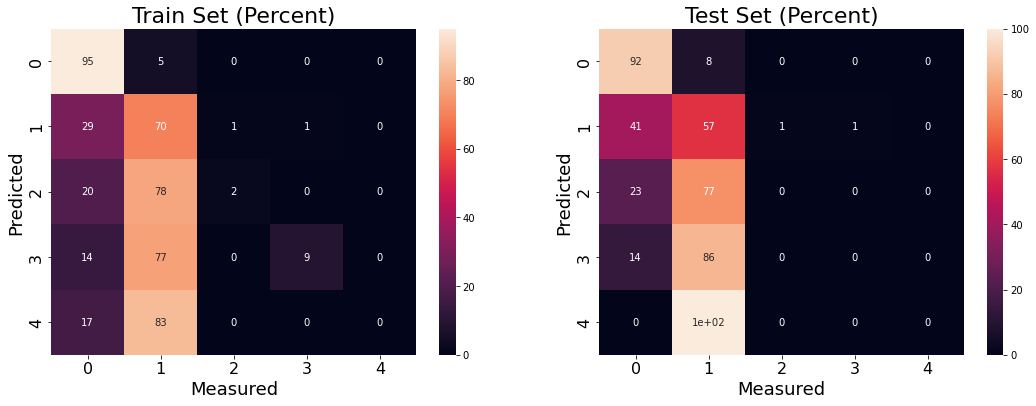

In [28]:
plot_confusion_matrix(xgb_cl, X_train, X_test, Y_train, Y_test)

Precision score for training set is :0.8
Precision score for testing  set is :0.75
Recall score for training set is :0.95
Recall score for testing  set is :0.92
F1 score for training set is :0.87
F1 score for testing  set is :0.83
AUC for training set is :0.91
AUC for testing  set is :0.81


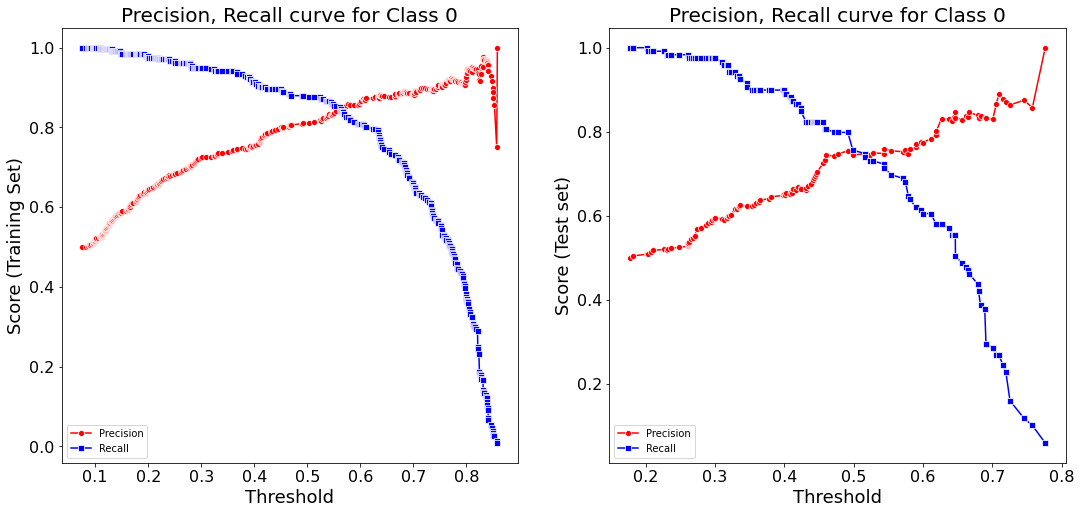

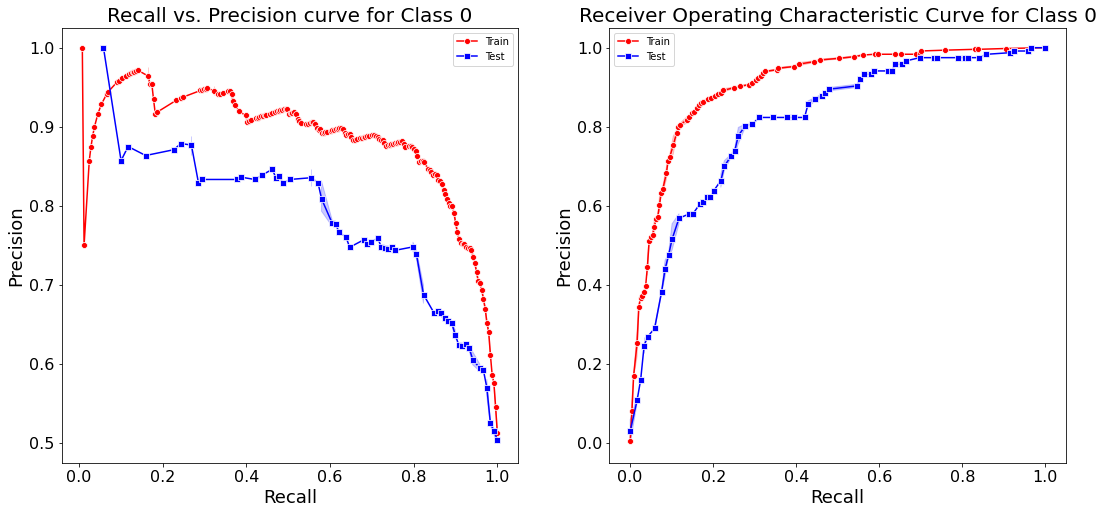

In [29]:
get_precision_recall(xgb_cl, X_train, X_test, Y_train, Y_test, 0)

Precision score for training set is :0.0
Precision score for testing  set is :0.0
Recall score for training set is :0.0
Recall score for testing  set is :0.0
F1 score for training set is :0.0
F1 score for testing  set is :0.0
AUC for training set is :0.82
AUC for testing  set is :0.82


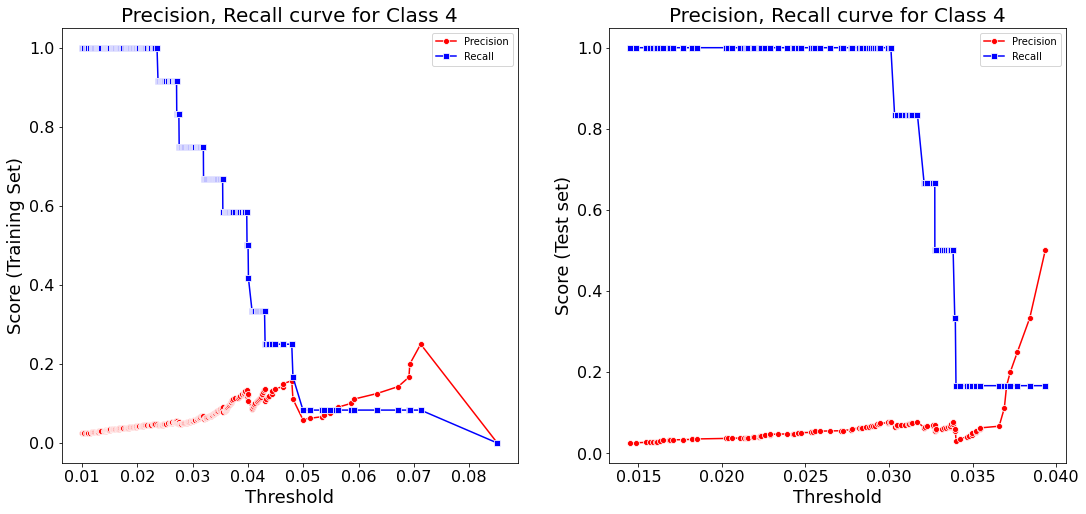

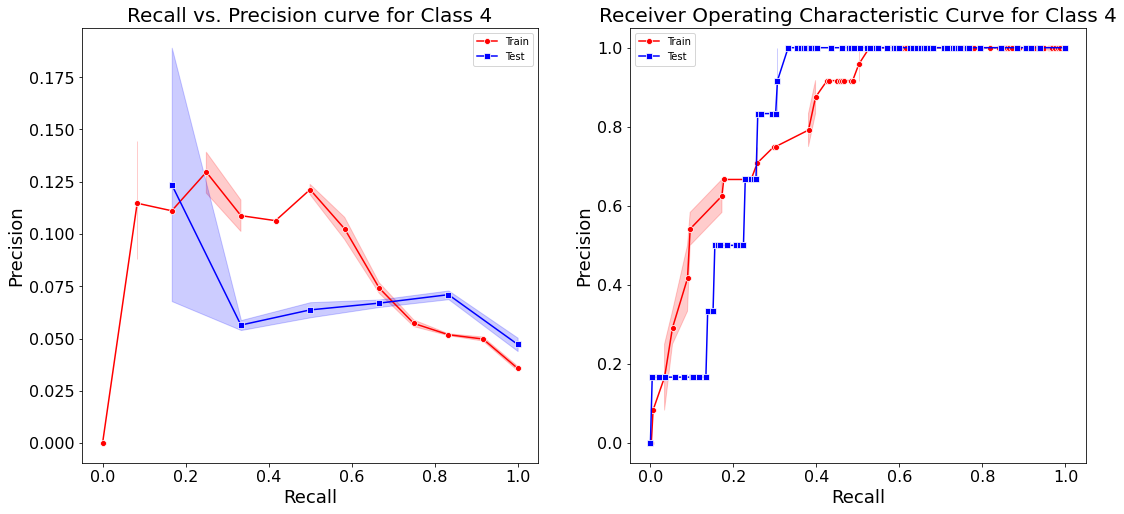

In [30]:
get_precision_recall(xgb_cl, X_train, X_test, Y_train, Y_test, 4)